In [16]:
import pandas as pd
import cPickle as pkl
import matplotlib
matplotlib.use("pgf")
pgf_with_rc_fonts = {
    "font.family": "serif",
    "font.serif": [u'Adobe Caslon Pro'],                   # use latex default serif font
    "font.sans-serif": ["DejaVu Sans"], # use a specific sans-serif font
}
matplotlib.rcParams.update(pgf_with_rc_fonts)
import matplotlib.pyplot as plt

%matplotlib inline

import seaborn as sns

/usr/lib/python2.7/dist-packages/ipykernel_launcher.py:4: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python2.7/runpy.py", line 174, in _run_module_as_main
    "__main__", fname, loader, pkg_name)
  File "/usr/lib/python2.7/runpy.py", line 72, in _run_code
    exec code in run_globals
  File "/usr/lib/python2.7/dist-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/usr/lib/python2.7/dist-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/usr/lib/python2.7/dist-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.start()
  File "/usr/lib/python2.7/dist-packages/zmq/eventloop/ioloop.py", l

In [2]:
pd.options.display.max_rows = 100

In [3]:
all_time_tes_annotated = pkl.load(open("../../parameters/all_time_tes_annotated.df"))
len(all_time_tes_annotated)

3727

We want to calculate a table of $\mu$ and $\sigma$ per functional category and time.

How many genes a functional group should have at minimum:

In [4]:
min_genes = 35

In [5]:
all_time_tes_annotated.head()

,0,300,600,900,1200,1500,1800,2100,2400,2700,3000,3300,Function
YBR177C,0.128333,0.133333,NaN,0.043333,0.055833,0.034167,0.031000,0.037500,0.091667,0.077500,0.123333,0.065000,
YIL140W,0.098333,0.100000,0.040833,0.048333,0.048333,0.031667,NaN,NaN,0.078333,NaN,NaN,NaN,
YLR268W,0.135000,0.110000,0.060333,0.054048,0.055333,0.036458,0.036970,0.034167,0.088333,0.080556,0.120000,0.072222,SNARE interactions in vesicular transport
YJL155C,0.115000,NaN,0.038333,0.053333,0.043333,0.035000,0.025833,0.020000,0.078333,0.080000,0.100000,0.075000,Carbohydrate metabolism
YLR197W,0.143333,0.145000,0.071322,0.069624,0.075333,0.048251,0.048145,0.050645,0.105000,0.108512,0.139792,0.102849,Ribosome biogenesis in eukaryotes


In [6]:
functional_counts = all_time_tes_annotated.Function.value_counts(dropna=False)

We keep only functional groups with at least `min_genes` genes to calculate a better $\mu$ and $\sigma$.
We drop the unlabelled ones.

In [7]:
functional_counts[functional_counts >= min_genes].index.drop(u'')

Index([u'Other enzymes', u'Amino acid metabolism', u'Chromosome-related',
       u'Ribosome', u'Cofactor biosynthesis', u'Lipid and steroid metabolism',
       u'Chaperones and folding catalysts',
       u'Ribosome biogenesis in eukaryotes', u'Glycolysis', u'Spliceosome',
       u'Glycan metabolism', u'Protein processing in endoplasmic reticulum',
       u'Translation factors', u'Oxidative phosphorylation', u'RNA transport',
       u'RNA degradation', u'tRNA loading'],
      dtype='object')

In [8]:
all_time_tes_annotated_selected = all_time_tes_annotated[all_time_tes_annotated
                                                         .Function.isin(functional_counts[functional_counts >= 
                                                                                          min_genes].index.drop(u''))]
len(all_time_tes_annotated_selected)

1118

In [20]:
means = all_time_tes_annotated_selected.groupby(['Function'], as_index=False).mean()
means.set_index('Function', inplace=True)

Display in color:

In [19]:
#cm = sns.light_palette("blue", as_cmap=True)
cm = sns.diverging_palette(240, 10, n=9, as_cmap=True)

means.round(decimals=3).style.background_gradient(cmap=cm)

In [22]:
print(means.round(decimals=3).to_latex())

\begin{tabular}{lrrrrrrrrrrrr}
\toprule
{} &   0    &   300  &   600  &   900  &   1200 &   1500 &   1800 &   2100 &   2400 &   2700 &   3000 &   3300 \\
Function                                    &        &        &        &        &        &        &        &        &        &        &        &        \\
\midrule
Amino acid metabolism                       &  0.127 &  0.127 &  0.059 &  0.061 &  0.064 &  0.041 &  0.041 &  0.042 &  0.092 &  0.095 &  0.122 &  0.087 \\
Chaperones and folding catalysts            &  0.120 &  0.121 &  0.063 &  0.065 &  0.068 &  0.044 &  0.044 &  0.045 &  0.095 &  0.094 &  0.118 &  0.089 \\
Chromosome-related                          &  0.085 &  0.087 &  0.038 &  0.040 &  0.040 &  0.025 &  0.025 &  0.027 &  0.062 &  0.062 &  0.083 &  0.058 \\
Cofactor biosynthesis                       &  0.098 &  0.098 &  0.046 &  0.048 &  0.047 &  0.030 &  0.031 &  0.031 &  0.072 &  0.070 &  0.099 &  0.068 \\
Glycan metabolism                           &  0.085 &  0.084 

Strangely `std()` does not work.

In [10]:
ranks = means.rank(ascending=True)
ranks

,0,300,600,900,1200,1500,1800,2100,2400,2700,3000,3300
Function,,,,,,,,,,,,
Amino acid metabolism,13.0,13.0,12.0,12.0,12.0,12.0,12.0,12.0,13.0,14.0,13.0,13.0
Chaperones and folding catalysts,12.0,12.0,15.0,14.0,15.0,14.0,14.0,13.0,14.0,13.0,12.0,14.0
Chromosome-related,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0
Cofactor biosynthesis,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0
Glycan metabolism,1.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,2.0,1.0,2.0
Glycolysis,15.0,14.0,14.0,15.0,14.0,13.0,13.0,15.0,15.0,15.0,14.0,15.0
Lipid and steroid metabolism,10.0,10.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,10.0,9.0
Other enzymes,8.0,8.0,7.0,6.0,6.0,7.0,7.0,5.0,7.0,7.0,6.0,7.0
Oxidative phosphorylation,16.0,16.0,17.0,17.0,17.0,17.0,17.0,17.0,16.0,16.0,16.0,17.0


In [11]:
ranks[3300]

Function
Amino acid metabolism                          13.0
Chaperones and folding catalysts               14.0
Chromosome-related                              1.0
Cofactor biosynthesis                           4.0
Glycan metabolism                               2.0
Glycolysis                                     15.0
Lipid and steroid metabolism                    9.0
Other enzymes                                   7.0
Oxidative phosphorylation                      17.0
Protein processing in endoplasmic reticulum     6.0
RNA degradation                                 8.0
RNA transport                                   3.0
Ribosome                                       12.0
Ribosome biogenesis in eukaryotes              10.0
Spliceosome                                     5.0
Translation factors                            16.0
tRNA loading                                   11.0
Name: 3300, dtype: float64

In [12]:
#anks.sort_index(axis='3300')
ranks.sort([3300]).index

/usr/lib/python2.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  


Index([u'Chromosome-related', u'Glycan metabolism', u'RNA transport',
       u'Cofactor biosynthesis', u'Spliceosome',
       u'Protein processing in endoplasmic reticulum', u'Other enzymes',
       u'RNA degradation', u'Lipid and steroid metabolism',
       u'Ribosome biogenesis in eukaryotes', u'tRNA loading', u'Ribosome',
       u'Amino acid metabolism', u'Chaperones and folding catalysts',
       u'Glycolysis', u'Translation factors', u'Oxidative phosphorylation'],
      dtype='object', name=u'Function')

/usr/lib/python2.7/dist-packages/ipykernel_launcher.py:28: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


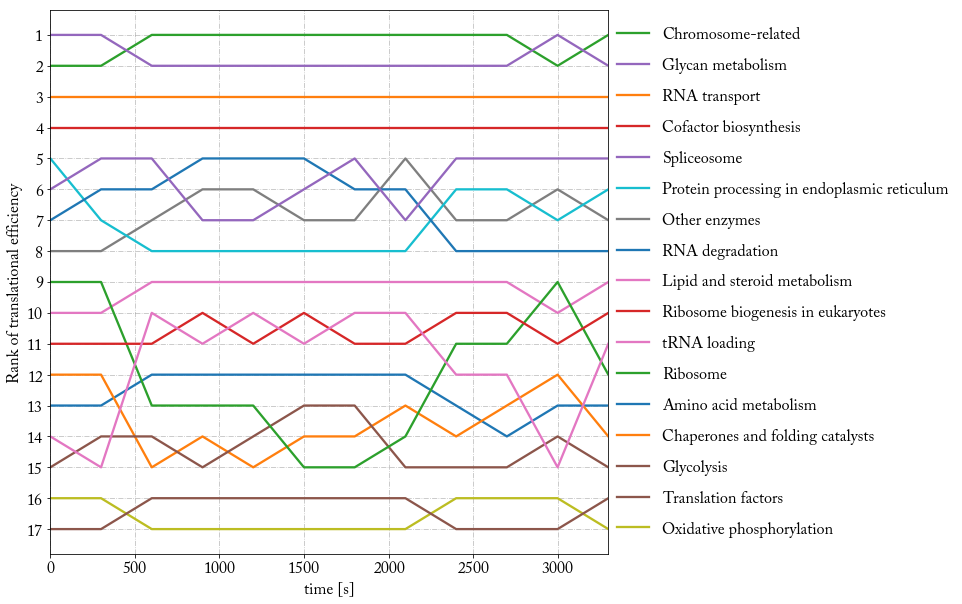

In [13]:
plt.close('all')

#plt.style.use('seaborn-poster')

font = {'family': 'serif', 'size': 16}
matplotlib.rc('font', **font)

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['axes.edgecolor']='black'
plt.rcParams['axes.labelcolor']='black'
plt.rcParams['xtick.color']='black'
plt.rcParams['ytick.color']='black'
plt.rcParams['grid.color']='grey'
plt.rcParams['grid.alpha']='0.5'
plt.rcParams['grid.linestyle']='-.'

ax = ranks.transpose().plot(linewidth=2.3)

plt.xlabel('time [s]')
plt.ylabel('Rank of translational efficiency')
plt.gca().invert_yaxis()
plt.gca().set_yticks(range(1, len(ranks) + 1, 1))
plt.grid()

handles, labels = ax.get_legend_handles_labels()

# sort labels
labels_tmp = ranks.sort([3300]).index
# sort handles the same way
# https://stackoverflow.com/questions/6618515/sorting-list-based-on-values-from-another-list
handles_tmp = [x for _, x in sorted(zip(ranks[3300], handles))]

plt.legend(handles_tmp, labels_tmp, loc='center left', bbox_to_anchor=(0.99, 0.5), labelspacing=0.93,
          frameon=False)

plt.savefig("ribosome_efficiency_ranking_vs_time.pgf", bbox_inches='tight')
#plt.show()

TODO: look at Kendall's $\tau$ as per

https://stats.stackexchange.com/questions/29560/can-i-compare-ordinal-rankings-and-if-so-how